In [38]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
    
from tqdm import trange
    
from scipy.integrate import quad    
from scipy.stats import uniform

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
nfw = csiborgtools.fits.NFWProfile()

In [196]:
Rs = 1
rho0 = 1
rmin = 0.01
rmax = 5

In [212]:
samples = nfw.rvs(rmin, rmax, Rs, 5000)

<IPython.core.display.Javascript object>


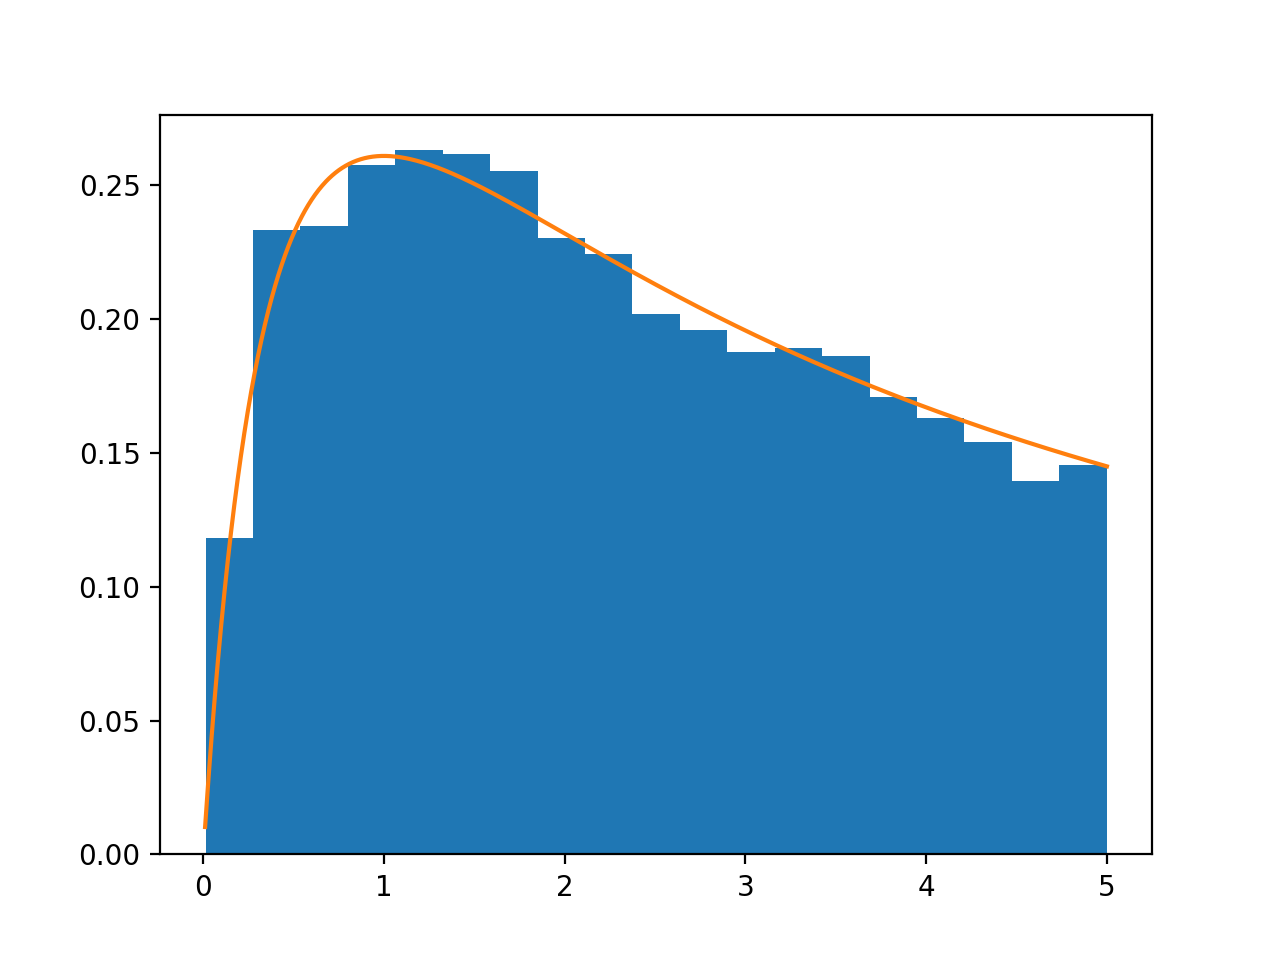

In [213]:
plt.figure()
plt.hist(samples, bins="auto", density=1)
plt.plot(x, nfw.pdf(x, Rs, rmin, rmax))
plt.show()

<IPython.core.display.Javascript object>


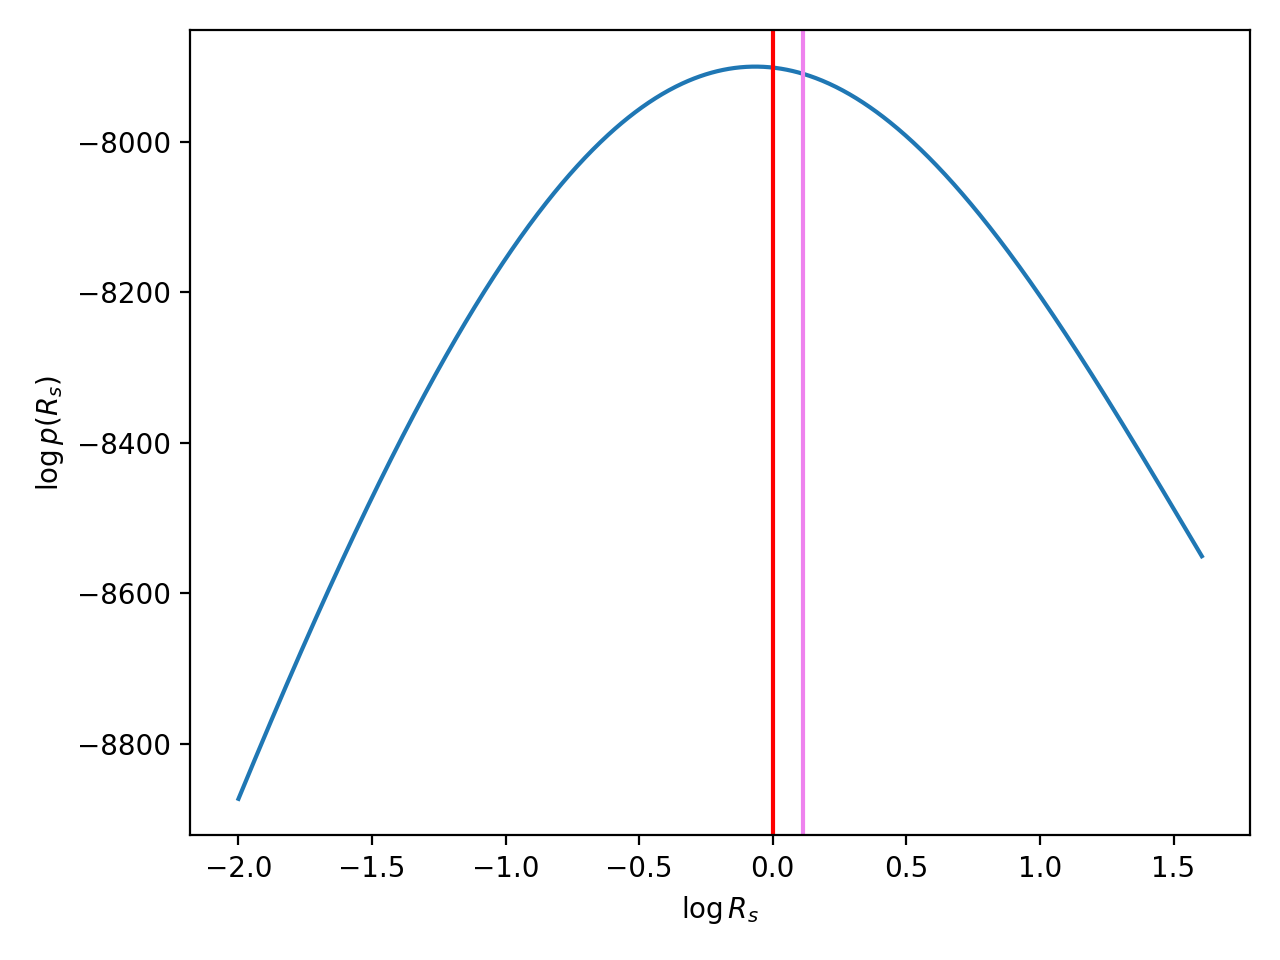

In [214]:
post = csiborgtools.fits.NFWPosterior(samples, np.ones_like(samples))

logrs = np.linspace(-2, np.log(rmax), 1000)

y = [post(val) for val in logrs]



plt.figure()
plt.plot(logrs, y)
plt.axvline(0, c="red")
plt.axvline(post.initlogRs, c="violet")
plt.ylabel(r"$\log p(R_s)$")
plt.xlabel(r"$\log R_{s}$")
plt.tight_layout()
# plt.savefig("../plots/prob.png", dpi=300)
plt.show()

In [ ]:
post._logrmin

In [ ]:
simpath = csiborgtools.io.get_sim_path(9844)
Nsnap = 1016



In [ ]:
clump_ids = csiborgtools.io.read_clumpid(Nsnap, simpath)
unique_ids = np.unique(clump_ids)
clump = csiborgtools.io.read_clumps(Nsnap, simpath)

In [ ]:
units = csiborgtools.units.BoxUnits(Nsnap, simpath)

In [ ]:
clump

In [ ]:
missing_ids = []
for i in trange(clump.size):
    if clump["index"][i] not in unique_ids:
        missing_ids += [i]
missing_ids = np.asarray(missing_ids)

In [ ]:
isparent = clump["index"] == clump["parent"]
islevel0 = clump["level"] == 0

print("There are {} clumps.".format(clump.size))
print("{} clumps have `index` = `parent_index`.".format(isparent.sum()))
print("{} clums have `level` = 0.".format(islevel0.sum()))

In [ ]:
(clump["level"][missing_ids] == 0).sum()

isparent[missing_ids].sum()

In [ ]:
np.sum((clump["level"] > 0) & isparent)

In [ ]:
x = isparent[missing_ids]
x.sum() / x.size

In [ ]:
x.sum()

In [ ]:
x.size

In [ ]:
plt.figure()


plt.hist(clump["level"][missing_ids], bins=30, histtype="step", label="missing")
plt.hist(clump["level"], bins=30, histtype="step", label="all")
plt.legend()
# plt.xscale("log")
# m = np.log10(units.box2solarmass(clump["mass_cl"][missing_ids]))
# plt.hist(m, bins="auto", histtype="step")

# M = np.log10(units.box2solarmass(clump["mass_cl"]))
# plt.hist(M, bins="auto", histtype="step")

plt.yscale("log")

plt.savefig("../plots")

plt.show()

In [ ]:
M = np.log10(units.box2solarmass(clump["mass_cl"]))
plt.figure()
plt.hist(M, bins="auto")

for m in M[ks]:
    plt.axvline(m, c="red", lw=0.01)

plt.show()

In [ ]:

#         print(np.log10(units.box2solarmass(clump["mass_cl"][k])))
#         print(np.sum(clump_ids == k))

In [ ]:
ks

In [ ]:
unique_ids.size

In [ ]:
clump["index"]

In [ ]:
unique_ids.size

In [ ]:
Ntotal

In [ ]:
Ntotal = unique_ids.size

Njobs = 69




Njobs_per_cpu = np.ones(Njobs, dtype=int) * Ntotal // Njobs
# Split the remainder Ntotal % Njobs among the CPU
Njobs_per_cpu[:Ntotal % Njobs] += 1



start = csiborgtools.io.nparts_to_start_ind(Njobs_per_cpu)

In [ ]:
Njobs_per_cpu.sum()

In [ ]:
Ntotal

In [ ]:
extras

In [ ]:
Ntotal

In [ ]:
Ntotal / 3

In [ ]:
#    Ntotal = unique_ids.size
#
#    Neach_section, extras = divmod(Ntotal, Njobs)
#
#
#    section_sizes = [0] + extras * [Neach_section+1] + (Nsections-extras) * [Neach_section]

In [ ]:
Ntotal = X.size
Nsections = 23
Neach_section, extras = divmod(Ntotal, Nsections)
section_sizes = [0] + extras * [Neach_section+1] + (Nsections-extras) * [Neach_section]

In [ ]:
div_points = np.core.numeric.array(section_sizes, dtype=np.core.numeric.intp).cumsum()

In [ ]:
np.core.numeric.array(10)

In [ ]:
clump

In [ ]:
unq = np.unique(clump_ids)

In [ ]:
unq.size

In [ ]:
k = 2

m = clump_ids == k
m

In [ ]:
clumps = csiborgtools.io.read_clumps(Nsnap, simpath, cols=["peak_x", "peak_y", "peak_z", "index", "parent", "level"])

In [ ]:
clumps["index"]

In [ ]:
filename = "/mnt/extraspace/hdesmond/ramses_out_9844/output_01016/info_01016.txt"

In [ ]:
results_filepath = '/mnt/extraspace/deaglan/H-AGN/'
sugata_filepath = '/mnt/extraspace/jeg/greenwhale/Sugata/'

def info_dir():
    return sugata_filepath + 'INFO/'

def info_file(nout):
    return info_dir() + 'info_' + str(nout).zfill(5) + '.txt'

def h_agn_particle_directory(nout):
    return sugata_filepath + 'H-AGN/output_' + str(nout).zfill(5) + '/'

def cosmo_dir():
    return './data/'

def cosmo_file(nout):
    return cosmo_dir() + 'cosmo_table_' + str(nout).zfill(5) + '.txt'

In [ ]:
info_dir()

In [ ]:
filename = "/mnt/extraspace/hdesmond/ramses_out_9844/output_01016/info_01016.txt"

In [ ]:
e